# Lab 6 : Clustering (part 1)

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics.cluster import contingency_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings('ignore')

## Part A : Analysing Fisher's Iris with the K-Means algorithm

Fisher's Iris are one of the most famous dataset: it describes the characteristics of 150 iris flowers based on their petals and sepals. The dataset contains 3 balanced classes representing 3 subspecies of the Iris flower (50 of each): Iris Virginica, Iris Setosa, and Iris Versicolor. One of the 3 class can easily be distinguished from the other 2 that are less separable.

#### Question 1 : Open the *iris.csv* file.

In [103]:
df_iris = pd.read_csv("Data/iris.csv")
df_iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#### Question 2 : The last column in your dataset contains the labels matching with the Iris specie to which each data belongs. Store these labels in a separate variable and remove them from the main dataset.

In [104]:
X = df_iris.drop(['Class'],axis=1)
Y = df_iris['Class']

Since these data are in 4 dimensions, before searching for clusters, you may want to run a PCA to check whether or not it will be easy to find clusters that can be separated. Obviously, this is not a real case of clustering, since the labels are known.

#### Question 3 : First, project the cloud points for this dataset with all 4 variables using seaborn. Then, run the PCA algorithm on your dataset. Based on your results, comment on eventual clusters that appear visually and their separability (or lack of it). Comment on what could happen when applying a clustering algorithm to these data.

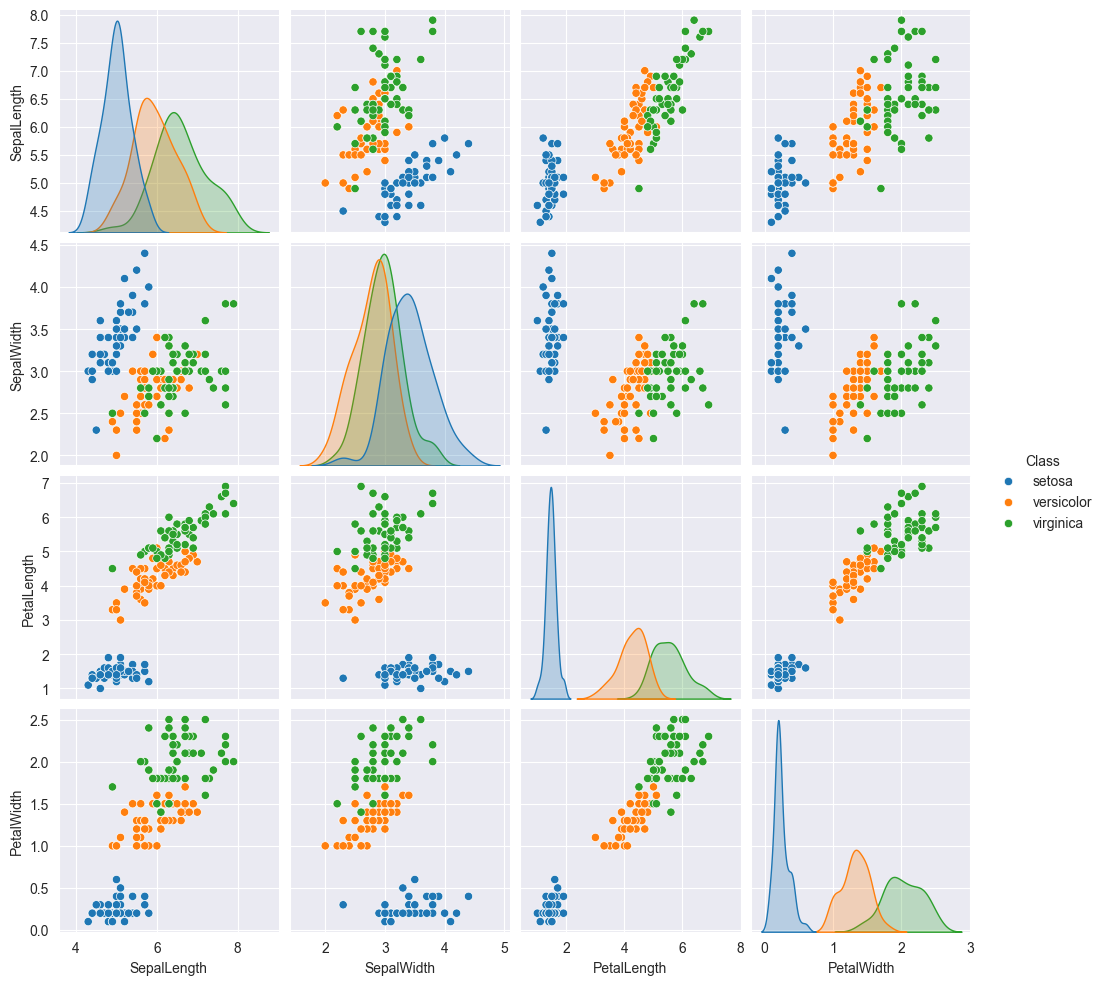

In [105]:
sns.pairplot(df_iris,hue="Class")

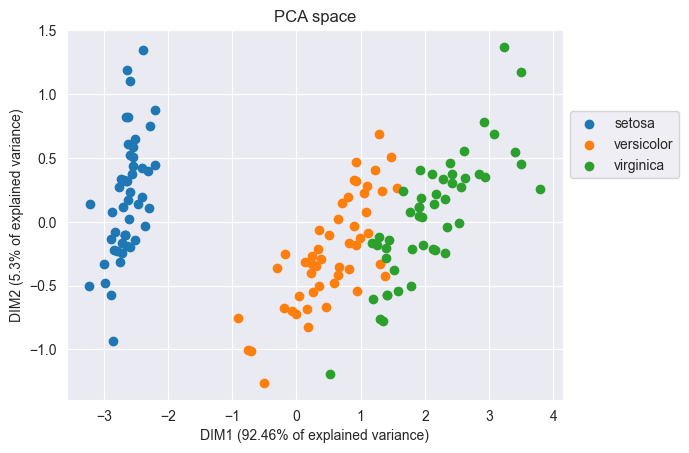

In [106]:
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(X)

class_list=np.unique(Y.values)
pc1 = round(pca.explained_variance_ratio_[0] * 100,2)
pc2 = round(pca.explained_variance_ratio_[1] * 100,2)

fig, ax = plt.subplots();
for cl in class_list:
    ax.scatter(iris_pca[Y==cl, 0], iris_pca[Y==cl, 1],label=cl);
ax.set_xlabel("DIM1 ({0}% of explained variance)".format(pc1, fontsize=11))
ax.set_ylabel("DIM2 ({0}% of explained variance)".format(pc2, fontsize=11))
ax.legend(bbox_to_anchor=(1, 0.8));    
ax.set_title('PCA space', fontsize=12);

#### Question 4 : Using the code below, run the K-Means algorithm from *sklearn.cluster* on your original dataset (not the PCA projection). Then, project the results to visualize and comment.

In [107]:
kmeans = KMeans(n_clusters=3, n_init=1, max_iter=300,init='random',random_state=0).fit(X)
kmeans.score(X)
iris_clusters = kmeans.predict(X)

iris_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

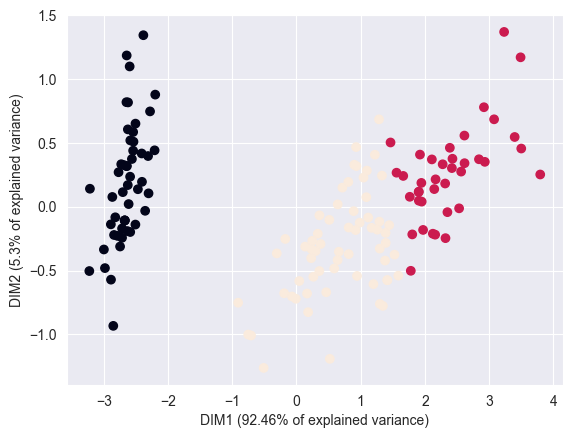

In [108]:
fig2, ax2 = plt.subplots();
ax2.scatter(iris_pca[:, 0], iris_pca[:, 1],c=iris_clusters);
ax2.set_xlabel("DIM1 ({0}% of explained variance)".format(pc1, fontsize=11))
ax2.set_ylabel("DIM2 ({0}% of explained variance)".format(pc2, fontsize=11))
ax.set_title('KMeans clustering in the PCA space', fontsize=12);

<u>Answer 4 : </u> 

We can observe a bit better separability

#### Question 5 : Re-run the K-Means code from the previous question several times with different initial random states. For each of them, compute the confusion matrix compared with the real classes. Comment on your results based on the visual projection and confusion matrices.

[[50  0  0]
 [ 0  2 48]
 [ 0 36 14]]


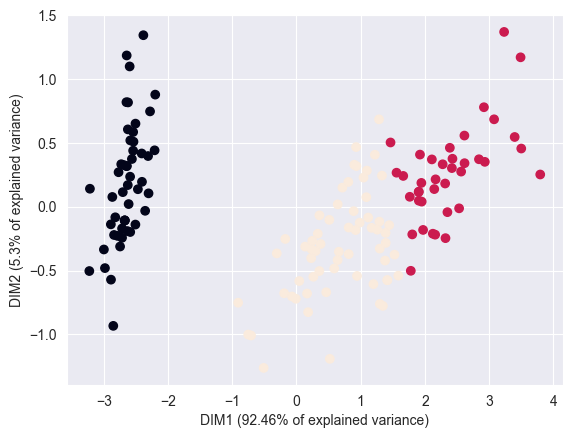

In [109]:
kmeans = KMeans(n_clusters=3, n_init=1, max_iter=300,init='random',random_state=0).fit(X)
kmeans.score(X)
iris_clusters0 = kmeans.predict(X)

tab=contingency_matrix(Y,iris_clusters0)
print(tab)

fig2, ax2 = plt.subplots();
ax2.scatter(iris_pca[:, 0], iris_pca[:, 1],c=iris_clusters0);
ax2.set_xlabel("DIM1 ({0}% of explained variance)".format(pc1, fontsize=11))
ax2.set_ylabel("DIM2 ({0}% of explained variance)".format(pc2, fontsize=11))
ax.set_title('KMeans clustering in the PCA space', fontsize=12);

[[30  0 20]
 [ 0 46  4]
 [ 0 50  0]]


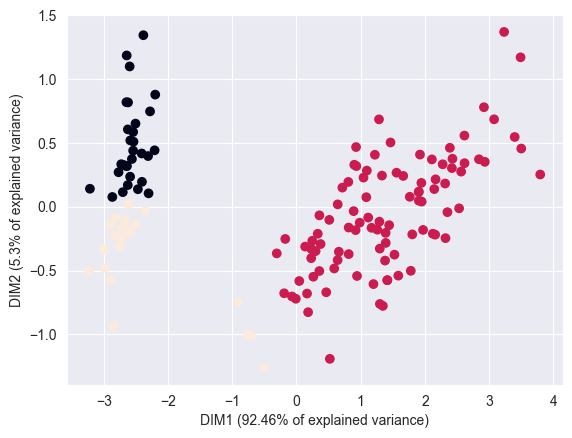

In [110]:
kmeans = KMeans(n_clusters=3, n_init=1, max_iter=300,init='random',random_state=5).fit(X)
kmeans.score(X)
iris_clusters5 = kmeans.predict(X)

tab=contingency_matrix(Y,iris_clusters5)
print(tab)

fig2, ax2 = plt.subplots();
ax2.scatter(iris_pca[:, 0], iris_pca[:, 1],c=iris_clusters5);
ax2.set_xlabel("DIM1 ({0}% of explained variance)".format(pc1, fontsize=11))
ax2.set_ylabel("DIM2 ({0}% of explained variance)".format(pc2, fontsize=11))
ax.set_title('KMeans clustering in the PCA space', fontsize=12);

[[ 0 50  0]
 [ 3  0 47]
 [36  0 14]]


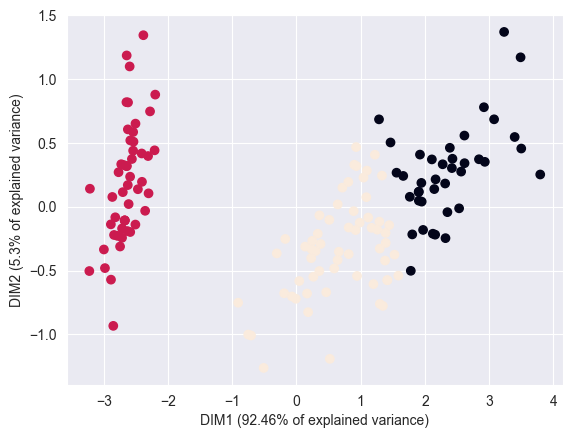

In [111]:
kmeans = KMeans(n_clusters=3, n_init=1, max_iter=300,init='random',random_state=10).fit(X)
kmeans.score(X)
iris_clusters10 = kmeans.predict(X)

tab=contingency_matrix(Y,iris_clusters10)
print(tab)

fig2, ax2 = plt.subplots();
ax2.scatter(iris_pca[:, 0], iris_pca[:, 1],c=iris_clusters10);
ax2.set_xlabel("DIM1 ({0}% of explained variance)".format(pc1, fontsize=11))
ax2.set_ylabel("DIM2 ({0}% of explained variance)".format(pc2, fontsize=11))
ax.set_title('KMeans clustering in the PCA space', fontsize=12);

<u>Answer 5 : </u> 

*Your comments*

#### Question 6 : Based on the confusion matrix with the real classes, choose a K-Means result of your choice that appear to visually give the best result and compute the silhouette index using the command *silhouette\_score()* from sklearn.metrics. Comment.

In [112]:
silhouette_avg = silhouette_score(X, iris_clusters0)
silhouette_avg

0.5525919445499757

#### Question 7 : Proposez une fonction qui prendrait en paramètre un jeu de données et les clusters associés et qui afficherait une visualisation de l'indice de silhouette pour tous les clusters et toutes les données.

The average silhouette_score is : 0.5525919445499757


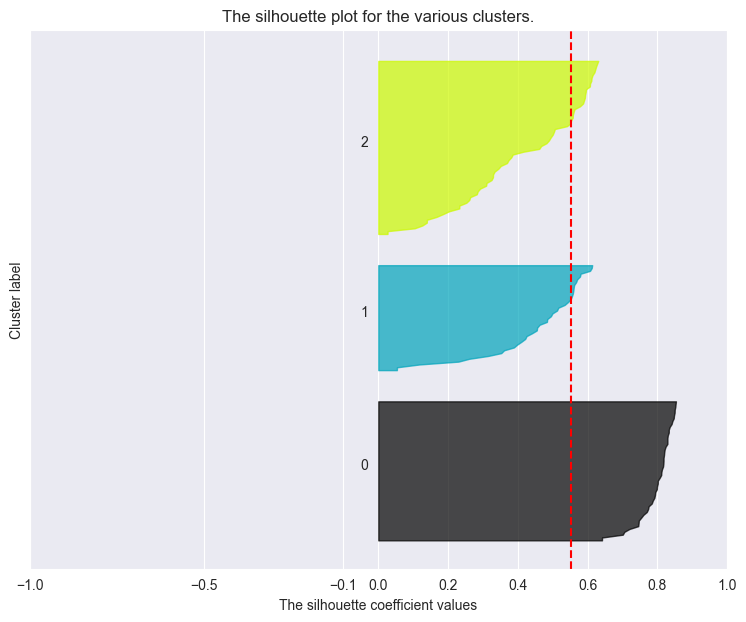

In [113]:
def silhouette_kmeans(X,cluster_labels):
  
    n_clusters=np.max(cluster_labels)+1
    fig,ax1 = plt.subplots()
    fig.set_size_inches(9, 7)

    # The silhouette coefficient can range from -1, 1
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])


    silhouette_avg = silhouette_score(X, cluster_labels)
    print("The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)



    y_lower = 10

    for i in range(0,n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
          sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-1,-0.5,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    return 
      
silhouette_kmeans(X,iris_clusters0)

## Part B : Hierarchical clustering

This exercise is a tutorial on how to use scipy's hierarchical clustering. First, you need the right packages :

In [114]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.cluster.hierarchy import cophenet, inconsistent, maxRstat
from scipy.spatial.distance import pdist

First, we will generate a sample of random data that we will use to try our clustering algorithm. 

#### Question 1 : Use the code below and try to modify the different parameters of the functions to create $a$ and $b$ to see what happens:

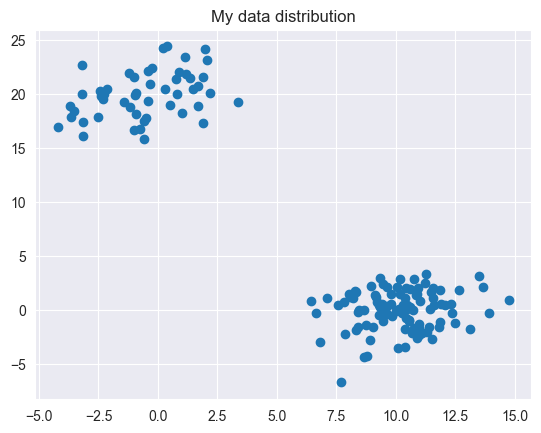

In [115]:
# np.random.seed(0)  # uncomment for repeatability
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)
plt.scatter(X[:,0], X[:,1])
plt.title('My data distribution')
plt.show()

The code below is used to generate the linkage matrix and visualize the dendrogram with a given linkage (ward in this example). 

#### Question 2 : After fixing the seed in the code above for repeatability, run the code below with different types of linkages and see what happens. Comment.

Cophenetic Correlation: 0.98


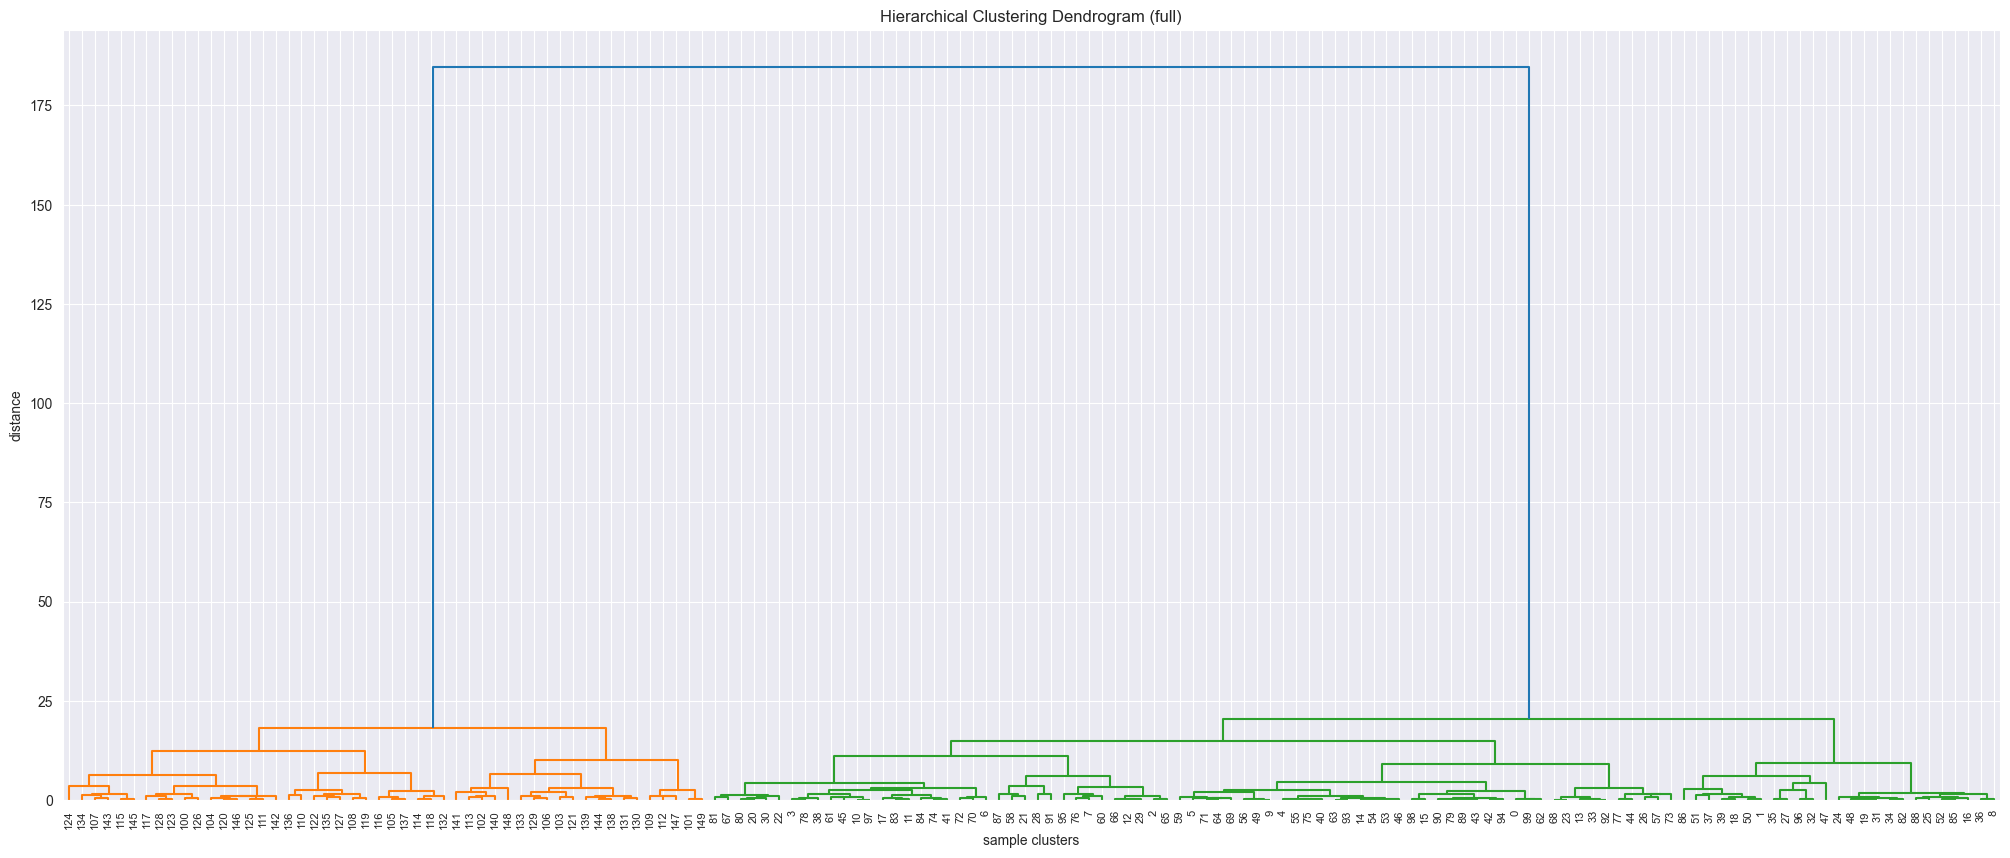

In [116]:
# alternative linkage methods: 'single', 'complete', 'average', 'cityblock' aka Manhattan, 'hamming', 'cosine'...

Z = linkage(X, 'ward', optimal_ordering=True)

c, coph_dists = cophenet(Z, pdist(X))
print('Cophenetic Correlation: %1.2f' % c)

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram (full)')
plt.xlabel('sample clusters')
plt.ylabel('distance')

dendrogram( Z, leaf_rotation=90., leaf_font_size=8.,)

plt.show()

<u>Answer 2 : </u>

Using different linkage methods changes order of the clusters that me merge to each other, because of using different linking approach. We can choose proper method based on our needs.

#### Question 3 : In the code above, what does the variable $Z$ contain ? Display it and try to explain it.

In [117]:
Z.shape

(149, 4)

In [118]:
Z

array([[1.00000000e+01, 9.70000000e+01, 4.83519461e-02, 2.00000000e+00],
       [5.40000000e+01, 5.30000000e+01, 6.03322520e-02, 2.00000000e+00],
       [6.80000000e+01, 2.30000000e+01, 6.83626727e-02, 2.00000000e+00],
       [1.90000000e+01, 3.10000000e+01, 8.17939948e-02, 2.00000000e+00],
       [5.50000000e+01, 7.50000000e+01, 1.27276016e-01, 2.00000000e+00],
       [4.90000000e+01, 9.00000000e+00, 1.30947909e-01, 2.00000000e+00],
       [6.30000000e+01, 9.30000000e+01, 1.31907351e-01, 2.00000000e+00],
       [7.10000000e+01, 6.40000000e+01, 1.31977567e-01, 2.00000000e+00],
       [3.30000000e+01, 9.20000000e+01, 1.49852831e-01, 2.00000000e+00],
       [7.90000000e+01, 8.90000000e+01, 1.53069771e-01, 2.00000000e+00],
       [8.30000000e+01, 1.10000000e+01, 1.61118952e-01, 2.00000000e+00],
       [9.60000000e+01, 3.20000000e+01, 1.67619466e-01, 2.00000000e+00],
       [9.90000000e+01, 6.20000000e+01, 1.78002318e-01, 2.00000000e+00],
       [1.28000000e+02, 1.23000000e+02, 1.86811217e

<u>Answer 3 : </u>

*Your answer*

A by 4 matrix Z is returned. At the -th iteration, clusters with indices Z[i, 0] and Z[i, 1] are combined to form cluster . A cluster with an index less than corresponds to one of the original observations. The distance between clusters Z[i, 0] and Z[i, 1] is given by Z[i, 2]. The fourth value Z[i, 3] represents the number of original observations in the newly formed cluster.

#### Question 4 : What are the definition and role of the cophenetic coefficient described in the code above. Explain how it could be interpreted.

<u>Answer 4 :</u>

The cophenetic coefficient is defined as the correlation coefficient between the cophenetic distances and the original pairwise distances. Cophenetic distances are the distances at which data points are merged during hierarchical clustering, derived from the linkage matrix Z. Original pairwise distances are the distances between all pairs of data points in the original dataset.
If the cophenetic coefficient is close to 1, it suggests that the dendrogram provides a reliable representation of the original data distances. This indicates that the hierarchical clustering algorithm has successfully captured the relationships between data points.
If the cophenetic coefficient is significantly lower than 1, it may indicate that the resulting dendrogram does not faithfully represent the original data distances. This could imply that the clustering algorithm did not capture the true underlying structure of the data well.

As you can see, the dendrogram can be pretty big and pretty messy. You can display a simplified version using the code below. 

#### Question 5 : In this code, explain the roles of parameters "truncate_mode" and "p".

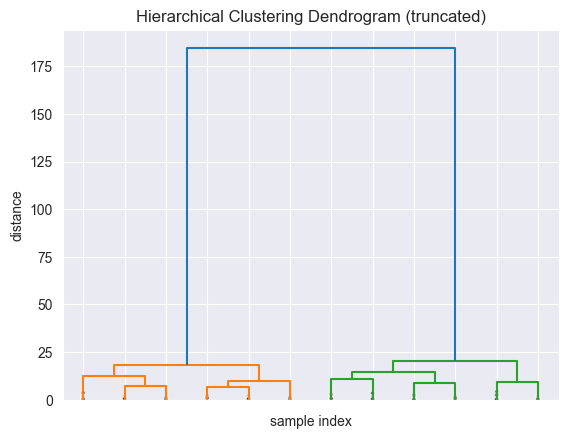

In [119]:
#display truncated dendrogram
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp', #to explain 
    p=12,  #to explain
    show_leaf_counts=False,  
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True, 
)
plt.show()

<u>Answer 5 :</u>

truncate_mode: It can have values like: lastp ,level , mtica, none
p:It defines number of last clustering steps to show on dendrogram in our case.

Finally, we want to cut the dendrogram to obtain the clusters. To do so, we can use two methods shown in the codes below. 

#### Question 6 : Explain how they differ, what the different parameters do, and the pros and cons of each. Try to modify the parameters to see what happens.

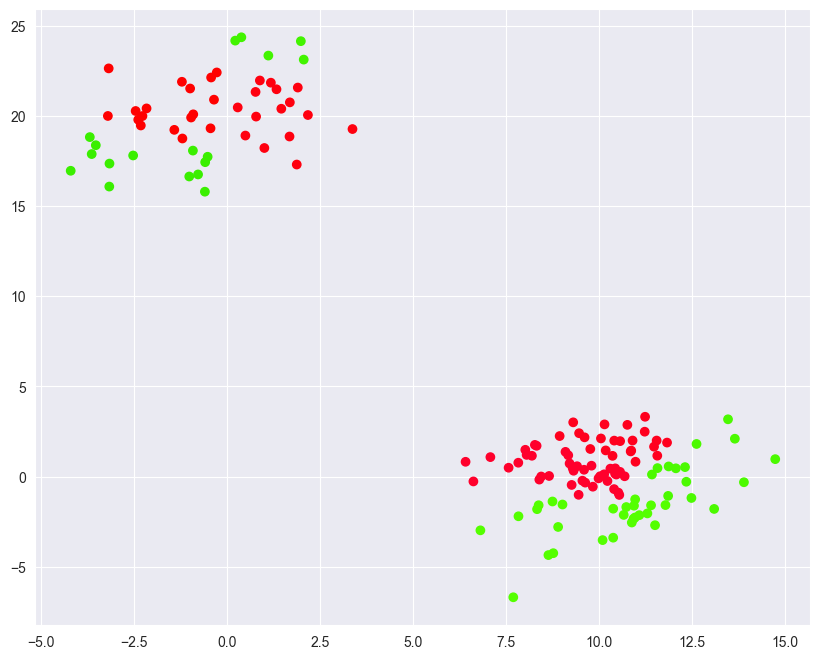

In [120]:
max_d = 10
clusters = fcluster( Z, max_d, criterion='distance')

plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')
plt.show()

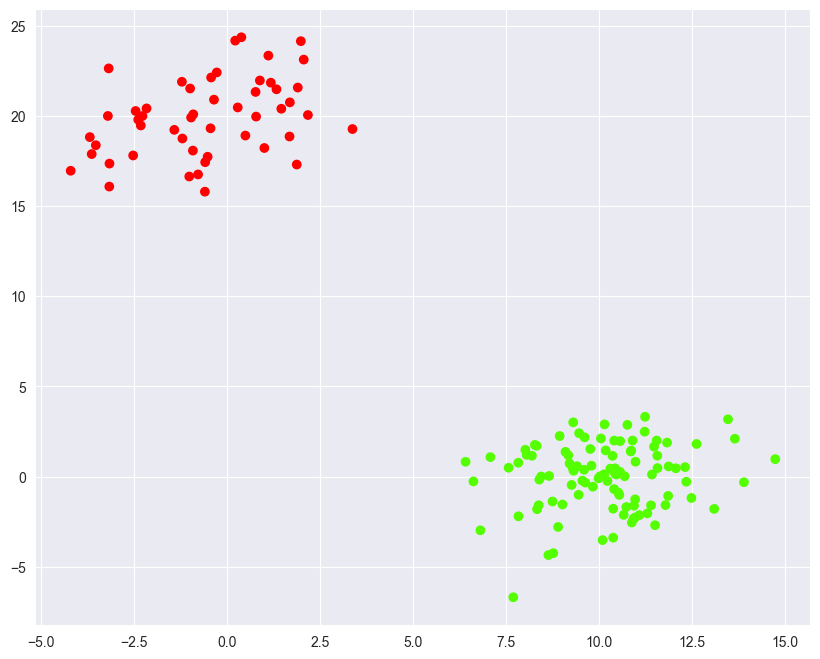

In [121]:
k=2
clusters = fcluster(Z,k,criterion='maxclust')

plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')
plt.show()

<u>Answer 6 :</u>

The two approaches are based on giving the number of clusters we want to obtaian and giving the max distance that is between points in each cluster.
Cutting by Distance:
Pros: Intuitive and interpretable; allows for flexible threshold-based clustering.
Cons: Choice of distance threshold may not always lead to meaningful clusters; resulting number of clusters may vary.
Cutting by Number of Clusters:
Pros: Allows for the creation of a specific number of clusters; useful when the desired number of clusters is known.
Cons: Resulting clusters may not align with the natural data structure; clusters may vary in size and shape.

#### Question 7 : Repeat questions 2 to 6 using different linkages and comment. 

<u>Answer 7 : </u>

Single Linkage: Also known as minimum linkage, this method merges clusters based on the minimum distance between any two points in the clusters.
Complete Linkage: Also known as maximum linkage, this method merges clusters based on the maximum distance between any two points in the clusters.
Average Linkage: This method merges clusters based on the average distance between all pairs of points in the clusters. 
Ward's Linkage: This method minimizes the variance when merging clusters, aiming to create clusters that minimize within-cluster variance.
The results are pretty different based on the chosen linkage method.

## Part C : Optimal cluster number in exoplanet data

In this exercice, we will try to guess the optimal number of clusters to be found in an artificial data set describing the atmospheric characteristics of exoplanets. 

#### Question 1 : Open the file *exo4_atm_extr.csv* with the correct parameters. Like for the first exercise, since this is a clustering exercise, remove the last column with the labels.

In [122]:
df_exo4_atm_extr = pd.read_csv("Data/exo4_atm_extr.csv",sep=";")
df_exo4_atm_extr

,PH2O,PHe,PCH4,PH2,PN2,PNH3,PO2,PAr,PCO2,PSO2,PK,Type
0,0.0,8.7,1.3,87.30,0.0,2.70,0.0,0.00,0.00,0.00,0.00,g
1,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.02,r
2,0.1,7.1,1.7,86.45,0.0,1.15,0.0,0.00,0.00,3.50,0.00,g
3,0.0,2.7,0.0,3.70,41.5,0.00,31.3,6.60,14.20,0.00,0.00,i
4,0.1,11.4,1.1,86.10,0.0,0.20,0.0,0.00,0.00,1.10,0.00,g
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.00,3.8,0.50,0.1,1.01,94.59,0.00,0.00,d
996,4.0,0.0,1.4,0.00,11.7,0.00,2.5,0.00,30.60,49.76,0.04,l
997,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,r
998,0.0,1.6,0.0,21.90,55.0,0.30,13.1,6.50,1.60,0.00,0.00,i


In [123]:
X = df_exo4_atm_extr.drop(['Type'], axis=1)
Y = df_exo4_atm_extr['Type']
Y.columns = ['Type']

#### Question 2 : Remind the different properties of the Calinski-Harabasz and Davies-Bouldin indexes.	

<u>Answer 2 :</u> 

Properties of the Davies-Bouldin index:

A lower DB value means a better clustering.
This index is not normalized.
It favors spherical clusters.
It is biased so that it gives lower values with fewer clusters.

Properties of the Calinski-Harabasz index:

Not normalized.
Better when higher.
With balanced clusters, the CH index is generally a good criterion to indicate the correct number of clusters.

#### Question 3 : Use sklearn.metrics to determine the optimal number of clusters with the K-Means algorithm based on the Davies-Bouldin and Calinski-Harabasz index. Explain with your own words what this function does.

In [124]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

In [125]:
history_DB=[]
history_CH=[]
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(X)
    labels = kmeans.labels_
    value_DB = davies_bouldin_score(X, labels)
    value_CH = calinski_harabasz_score(X, labels)
    history_DB.append(value_DB)
    history_CH.append(value_CH)
x_value = np.arange(2,11)

In [126]:
Delta_DB=np.gradient(history_DB)
print(Delta_DB)

Delta_CH=np.gradient(history_CH)
print(Delta_CH)

[-0.20178269 -0.11960778 -0.00082783  0.08260287  0.13923492  0.05783052
 -0.00923824  0.05638256  0.09786133]
[1528.12118004 5031.51262166 3797.77974327 -900.22121004 1479.32368569
 3204.50344899 2138.79626482  442.89444587 -802.54195465]


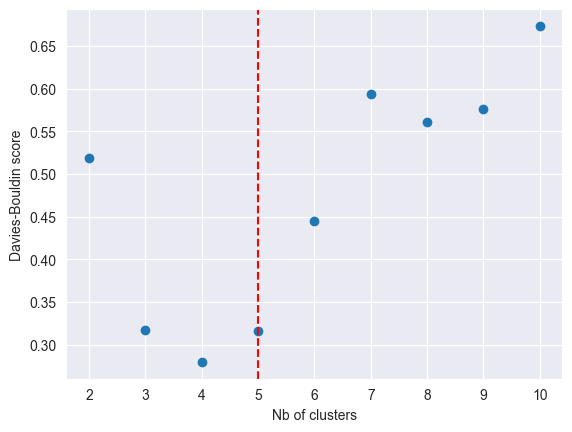

In [127]:
#elbow method
fig, ax = plt.subplots()
ax.scatter(range(2, 11), history_DB)
ax.axvline(x=2+np.argmax(Delta_DB)-1, color="red", linestyle="--", label='the best partition')
ax.set_xlabel("Nb of clusters")
ax.set_ylabel("Davies-Bouldin score")
plt.show()

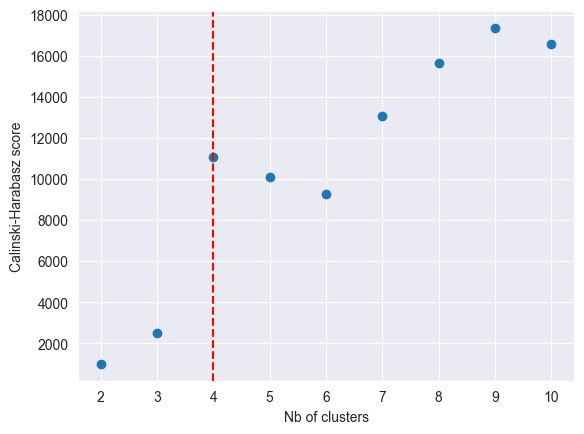

In [128]:
#elbow method
fig, ax = plt.subplots()
ax.scatter(range(2, 11), history_CH)
ax.axvline(x=2+np.argmax(Delta_CH)+1, color="red", linestyle="--", label='the best partition')
ax.set_xlabel("Nb of clusters")
ax.set_ylabel("Calinski-Harabasz score")
plt.show()

#### Question 4 : Comment yours results. You can use PCA and the real labels in your explanations. You may try with and without data normalization.

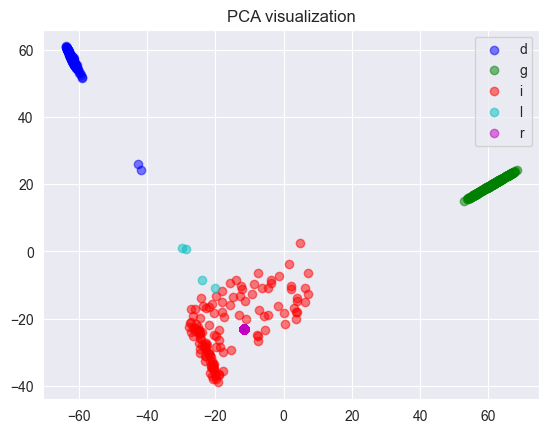

In [129]:
colors = "bgrcmykw"
n_components = 2
pca = PCA(n_components=n_components)
pca.fit(X)
data_pca = pca.transform(X)
fig, ax = plt.subplots()
for i, cl in enumerate(np.unique(Y)): #we do the loop to be able to show labels
    ax.scatter(data_pca[:,0][Y==cl], data_pca[:,1][Y==cl], c=colors[i], label=cl, alpha=0.5) #we generate new colors iteratively
ax.legend()
plt.title('PCA visualization')
plt.show()

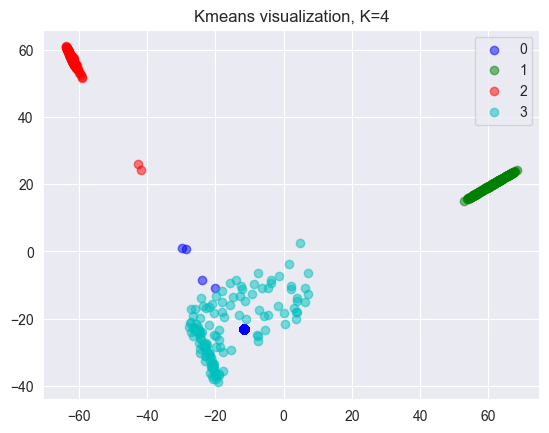

In [130]:
# We do k-means for 4 clusters (minimum score of DB)
prediction = KMeans(n_clusters=4, random_state=42, n_init=5, max_iter=300).fit_predict(X)
fig, ax = plt.subplots()
for i, cl in enumerate(np.unique(prediction)): #we do the loop to be able to show labels
    ax.scatter(data_pca[:,0][prediction==cl], data_pca[:,1][prediction==cl], c=colors[i], label=cl, alpha=0.5) #we generate new colors iteratively
ax.legend()
plt.title('Kmeans visualization, K=4')
plt.show()

## Part D : Wisconsin Data Breast Cancer

Using the previous exercises as examples, open the WDBC dataset, analyze these data and the class/cluster separability. Then, run one or several clustering algorithm and compare the results in term of quality. Do not hesitate to use classical attribute analysis methods as well as projections and visualizations to explain your analysis. You may want to read the *wdbc.names* fil to understand what the data and different attributes are about.

In [131]:
wdbc = pd.read_csv("Data/wdbc.data",sep=",",header=None,index_col=0)
wdbc

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [132]:
X = wdbc.drop([1], axis=1)
Y = wdbc[1]
Y.columns = ['Status']

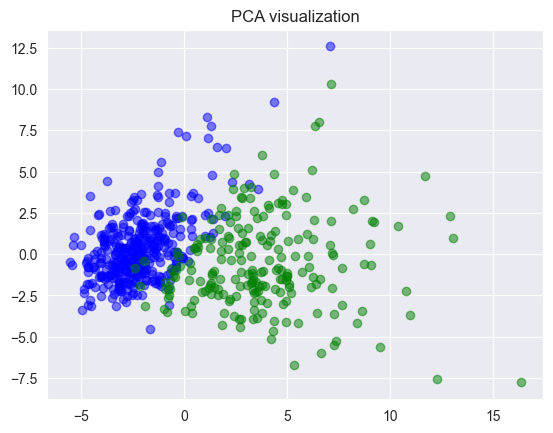

In [133]:
scaler = StandardScaler().fit(X.values) 
X_norm = scaler.transform(X.values)

colors = "bgrcmykw"
n_components = 2
pca = PCA(n_components=n_components)
pca.fit(X_norm)
data_pca = pca.transform(X_norm)
fig, ax = plt.subplots()
for i, cl in enumerate(np.unique(Y)): 
    ax.scatter(data_pca[:,0][Y==cl], data_pca[:,1][Y==cl], c=colors[i], label=cl, alpha=0.5) 
plt.title('PCA visualization')
plt.show()

The average silhouette_score is : 0.6972646156059465


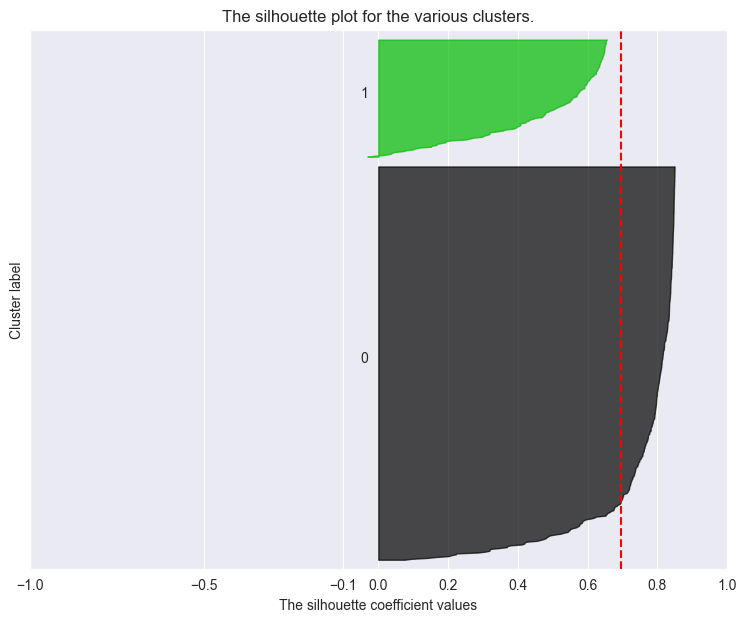

In [134]:
## KMeans, K=2
kmeans = KMeans(n_clusters=2, n_init=10, max_iter=300).fit(X)
kmeans.score(X)
dbscan_kmeans_clusters = kmeans.predict(X)

silhouette_kmeans(X,dbscan_kmeans_clusters)

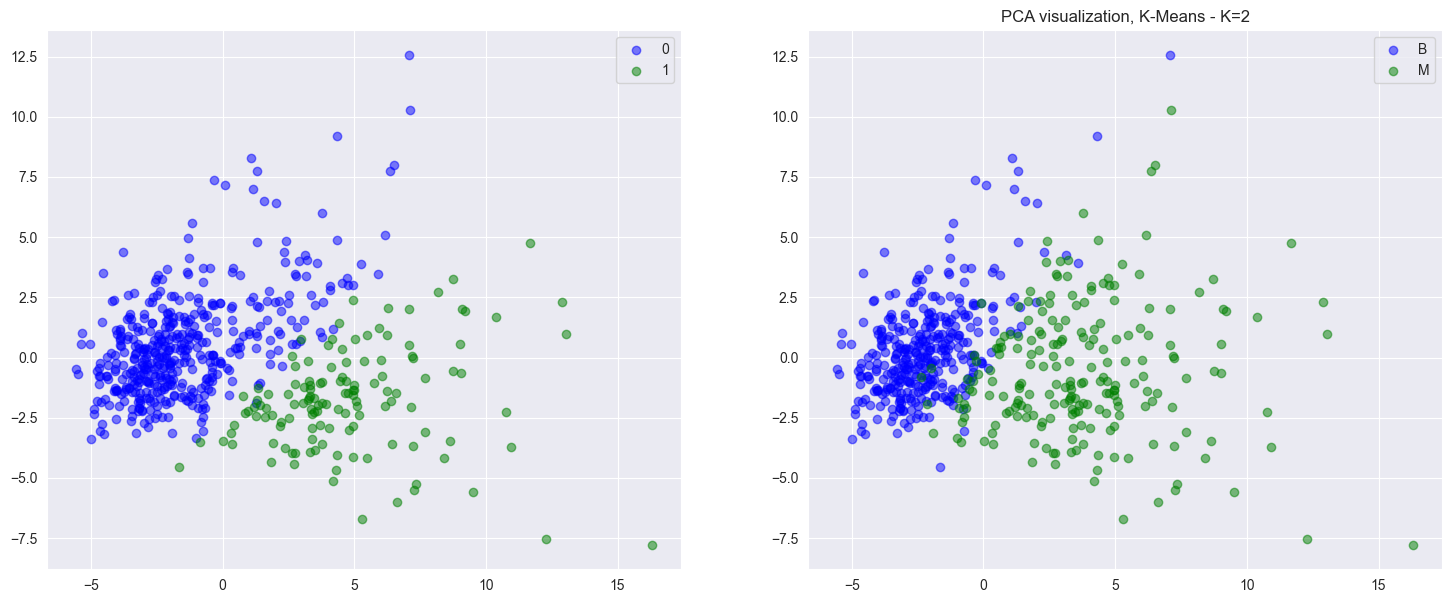

In [135]:
colors = "bgrcmykw"
n_components = 2
pca = PCA(n_components=n_components)
pca.fit(X_norm)
data_pca = pca.transform(X_norm)
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(18, 7)
for i, cl in enumerate(np.unique(dbscan_kmeans_clusters)): #we do the loop to be able to show labels
    ax1.scatter(data_pca[:,0][dbscan_kmeans_clusters==cl], data_pca[:,1][dbscan_kmeans_clusters==cl], c=colors[i], label=cl, alpha=0.5) #we generate new colors iteratively
ax1.legend()
for i, cl in enumerate(np.unique(Y)): 
    ax2.scatter(data_pca[:,0][Y==cl], data_pca[:,1][Y==cl], c=colors[i], label=cl, alpha=0.5)
ax2.legend()    
plt.title('PCA visualization, K-Means - K=2')
plt.show()

In [136]:
tab=contingency_matrix(Y,dbscan_kmeans_clusters)
print(tab)

[[356   1]
 [ 82 130]]


Cophenetic Correlation : 0.79


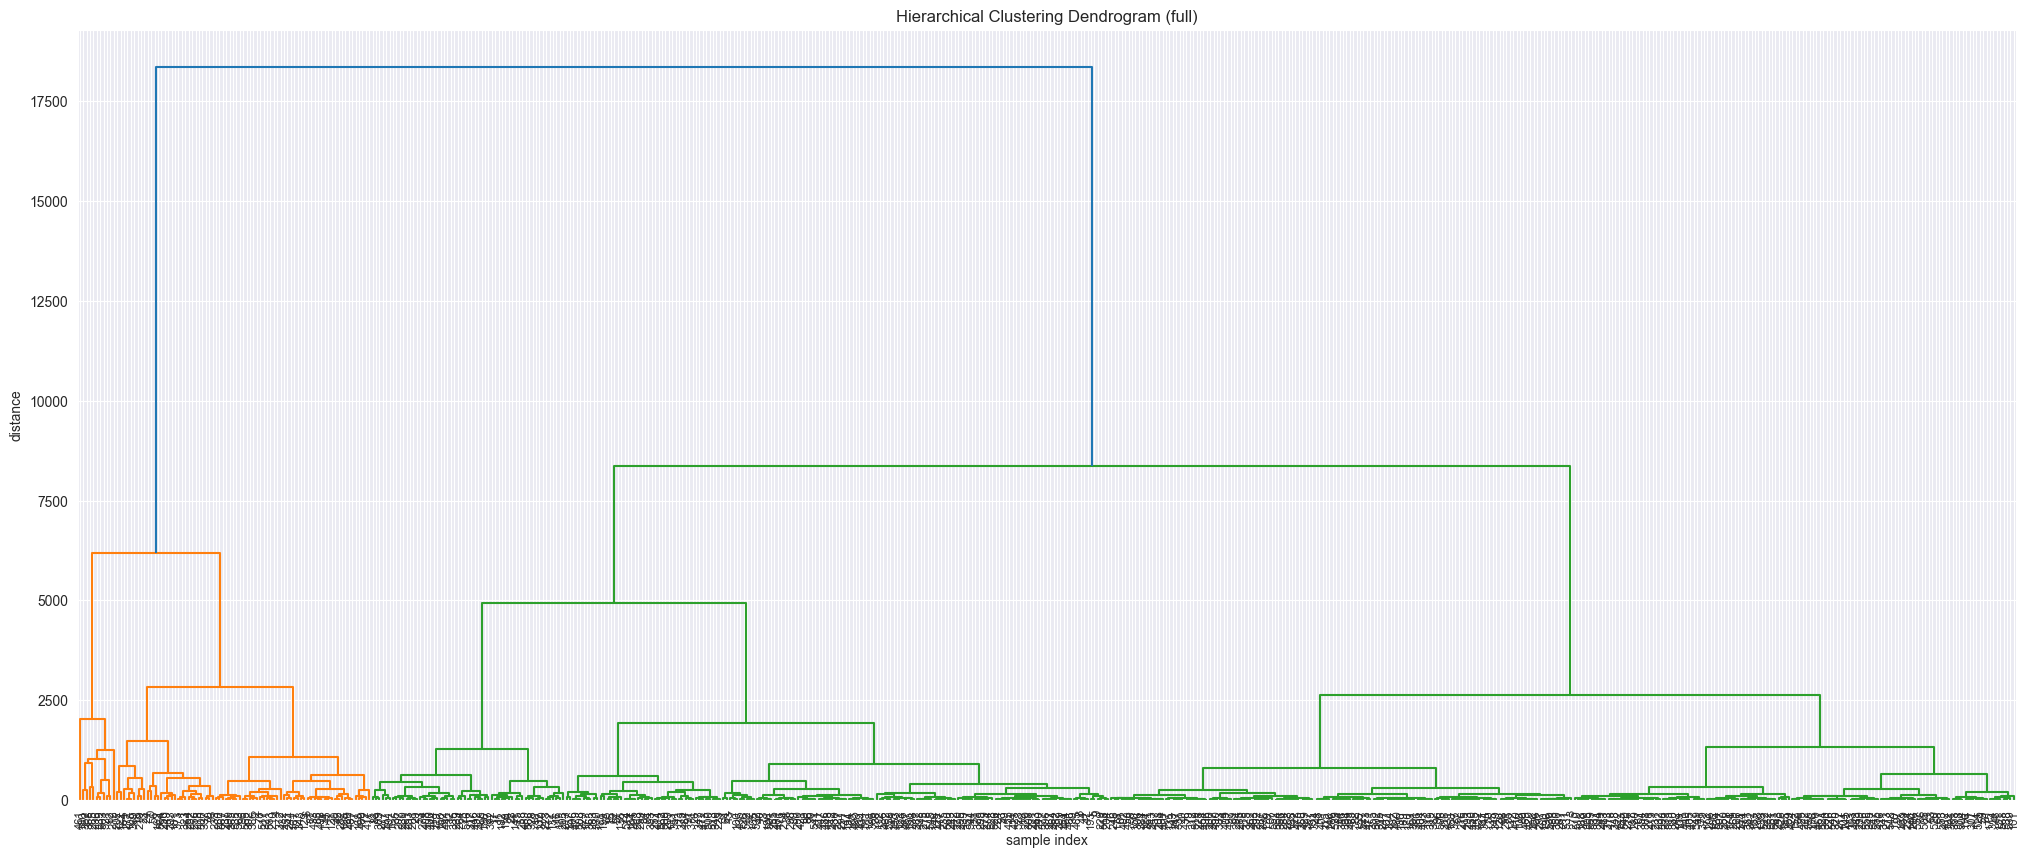

In [137]:
# HCA
Z = linkage(X, 'ward', optimal_ordering=True)
c, coph_dists = cophenet(Z, pdist(X))
print ('Cophenetic Correlation : %1.2f' % c)
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram (full)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

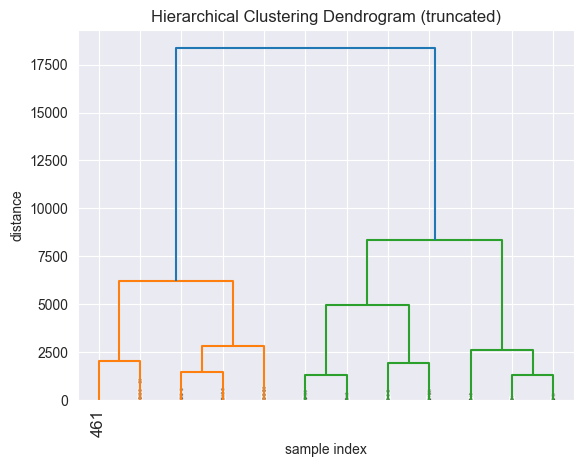

In [138]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [139]:
k=2
hca_clusters = fcluster(Z, k, criterion='maxclust')
hca_clusters

array([1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,

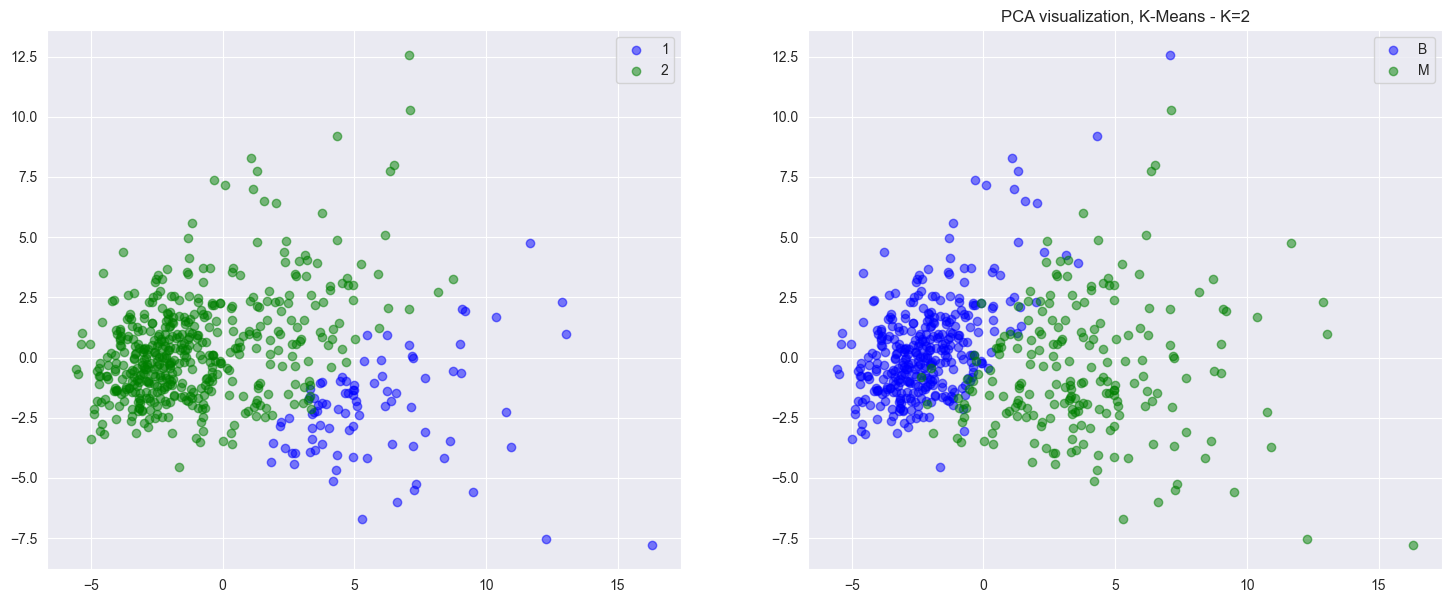

In [140]:
colors = "bgrcmykw"
n_components = 2
pca = PCA(n_components=n_components)
pca.fit(X_norm)
data_pca = pca.transform(X_norm)
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(18, 7)
for i, cl in enumerate(np.unique(hca_clusters)): #we do the loop to be able to show labels
    ax1.scatter(data_pca[:,0][hca_clusters==cl], data_pca[:,1][hca_clusters==cl], c=colors[i], label=cl, alpha=0.5) #we generate new colors iteratively
ax1.legend()
for i, cl in enumerate(np.unique(Y)): 
    ax2.scatter(data_pca[:,0][Y==cl], data_pca[:,1][Y==cl], c=colors[i], label=cl, alpha=0.5)
ax2.legend()    
plt.title('PCA visualization, K-Means - K=2')
plt.show()

In [141]:
tab=contingency_matrix(Y,hca_clusters)
print(tab)

[[  0 357]
 [ 86 126]]
